# A Box Office Analysis

## 1. Business Understanding

### a) Introduction

### b) Problem Statement

### c) Main Objective

To provide actionable insights based on an analysis into the films dominating the box office.


### d) Specific Objectives

### e) Experimental Design

### f) Data Understanding

## 2. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


## 3. Reading the Data

In [2]:
# Loading movie gross income data
movie_gross = pd.read_csv("DataSets/bom.movie_gross.csv.gz" )
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Loading movie info data
movie_info = pd.read_csv("DataSets/rt.movie_info.tsv.gz" , sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
# Loading movie reviews data
movie_reviews = pd.read_csv("DataSets/rt.reviews.tsv.gz", sep='\t', encoding='latin1')
movie_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [5]:
# Loading the movie db data
tmdb = pd.read_csv("DataSets/tmdb.movies.csv.gz" )
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
# Loading movie budgets data
movie_budgets = pd.read_csv("DataSets/tn.movie_budgets.csv.gz" )
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# Connect to the sqlite3 database
conn = sqlite3.connect('DataSets/im.db/im.db')

# Create a cursor object
cursor = conn.cursor()

# Get names of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()
for name in table_names:
    print(name[0]) 


movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers
reviews_table


## 4. Data Wrangling
This process is to convert the data into a more useable form.

### 4.1 Dropping Columns.
The first step involves getting information about the data frames. 
The data frames are then analyzed to determine the number of missing values present in each column. 
Using the gathered information, the final step is discarding unnecessary columns, retaining only the necessary ones.

#### 4.1.1 movie_gross Data Frame

In [8]:
# getting info about movie_gross dataset
movie_gross.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [9]:
#getting number of NaN values in the movie_gross dataset
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
#changing NaN values to 0 in foreign_gross in movie_gross 
movie_gross['foreign_gross'].fillna(0, inplace=True)
movie_gross['foreign_gross'] 

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object

In [12]:
# getting sum of domestic_gross and foreign_gross to get total gross income.
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '').astype(float)
movie_gross['total_gross'] = (movie_gross['domestic_gross'] + pd.to_numeric(movie_gross['foreign_gross']))
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [13]:
# Selecting relevant columns.
movie_gross_1 = movie_gross[["title", "studio", "total_gross"]]
movie_gross_1

,title,studio,total_gross
0,Toy Story 3,BV,1.067000e+09
1,Alice in Wonderland (2010),BV,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,9.603000e+08
3,Inception,WB,8.283000e+08
4,Shrek Forever After,P/DW,7.526000e+08
...,...,...,...
3382,The Quake,Magn.,NaN
3383,Edward II (2018 re-release),FM,NaN
3384,El Pacto,Sony,NaN
3385,The Swan,Synergetic,NaN


#### 4.1.2 movie_info Data Frame

In [16]:
# getting info about movie_info dataset
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [17]:
#getting number of NaN values in the movie_info dataset
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [20]:
# Selecting relevant columns.
movie_info_1 = movie_info[["rating", "genre", "director", "writer", "runtime"]]
movie_info_1

,rating,genre,director,writer,runtime
0,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,104 minutes
1,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,108 minutes
2,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,116 minutes
3,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,128 minutes
4,NR,Drama|Romance,Rodney Bennett,Giles Cooper,200 minutes
...,...,...,...,...,...
1555,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,106 minutes
1556,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,88 minutes
1557,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,111 minutes
1558,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,101 minutes


#### 4.1.3 movie_reviews Data Frame

In [21]:
# getting info about movie_reviews dataset
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [22]:
#getting number of NaN values in the movie_reviews dataset
movie_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [23]:
# Selecting relevant columns.
movie_reviews_1 = movie_reviews[["rating", "critic"]]
movie_reviews_1

,rating,critic
0,3/5,PJ Nabarro
1,NaN,Annalee Newitz
2,NaN,Sean Axmaker
3,NaN,Daniel Kasman
4,NaN,NaN
...,...,...
54427,NaN,Laura Sinagra
54428,1/5,Michael Szymanski
54429,2/5,Emanuel Levy
54430,2.5/5,Christopher Null


#### 4.1.4 tmdb Data Frame

In [24]:
# getting info about tmdb dataset
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [25]:
#getting number of NaN values in the tmdb dataset
tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [26]:
# Selecting relevant columns.
tmdb_1 =tmdb[["title", "vote_average", "vote_count", "popularity"]]
tmdb_1

,title,vote_average,vote_count,popularity
0,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,33.533
1,How to Train Your Dragon,7.7,7610,28.734
2,Iron Man 2,6.8,12368,28.515
3,Toy Story,7.9,10174,28.005
4,Inception,8.3,22186,27.920
...,...,...,...,...
26512,Laboratory Conditions,0.0,1,0.600
26513,_EXHIBIT_84xxx_,0.0,1,0.600
26514,The Last One,0.0,1,0.600
26515,Trailer Made,0.0,1,0.600


#### 4.1.5 movie_budgets Data Frame

In [27]:
# getting info about movie_budgets dataset
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
#getting number of NaN values in the movie_budgets dataset
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [29]:
# Selecting relevant columns.
movie_budgets_1 = movie_budgets[[ "production_budget", "worldwide_gross"]]
movie_budgets_1

,production_budget,worldwide_gross
0,"$425,000,000","$2,776,345,279"
1,"$410,600,000","$1,045,663,875"
2,"$350,000,000","$149,762,350"
3,"$330,600,000","$1,403,013,963"
4,"$317,000,000","$1,316,721,747"
...,...,...
5777,"$7,000",$0
5778,"$6,000","$240,495"
5779,"$5,000","$1,338"
5780,"$1,400",$0


#### 4.1.6 Exploring the im.db database to see the kind of information contained.

In [31]:
# Getting data from principals table 
cursor.execute("SELECT * FROM principals LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('tt0111414', 1, 'nm0246005', 'actor', None, '["The Man"]')
('tt0111414', 2, 'nm0398271', 'director', None, None)
('tt0111414', 3, 'nm3739909', 'producer', 'producer', None)
('tt0323808', 10, 'nm0059247', 'editor', None, None)
('tt0323808', 1, 'nm3579312', 'actress', None, '["Beth Boothby"]')


In [32]:
# Getting data from persons table 
cursor.execute("SELECT * FROM persons LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row)

('nm0061671', 'Mary Ellen Bauder', None, None, 'miscellaneous,production_manager,producer')
('nm0061865', 'Joseph Bauer', None, None, 'composer,music_department,sound_department')
('nm0062070', 'Bruce Baum', None, None, 'miscellaneous,actor,writer')
('nm0062195', 'Axel Baumann', None, None, 'camera_department,cinematographer,art_department')
('nm0062798', 'Pete Baxter', None, None, 'production_designer,art_department,set_decorator')


In [33]:
# Getting data from movie_basics table 
cursor.execute("SELECT * FROM movie_basics LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama')
('tt0066787', 'One Day Before the Rainy Season', 'Ashad Ka Ek Din', 2019, 114.0, 'Biography,Drama')
('tt0069049', 'The Other Side of the Wind', 'The Other Side of the Wind', 2018, 122.0, 'Drama')
('tt0069204', 'Sabse Bada Sukh', 'Sabse Bada Sukh', 2018, None, 'Comedy,Drama')
('tt0100275', 'The Wandering Soap Opera', 'La Telenovela Errante', 2017, 80.0, 'Comedy,Drama,Fantasy')


In [34]:
# Getting data from movie_ratings table 
cursor.execute("SELECT * FROM movie_ratings LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('tt10356526', 8.3, 31)
('tt10384606', 8.9, 559)
('tt1042974', 6.4, 20)
('tt1043726', 4.2, 50352)
('tt1060240', 6.5, 21)


In [35]:
# Getting data from movie_akas table 
cursor.execute("SELECT * FROM movie_akas LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('tt0369610', 10, 'Джурасик свят', 'BG', 'bg', None, None, 0.0)
('tt0369610', 11, 'Jurashikku warudo', 'JP', None, 'imdbDisplay', None, 0.0)
('tt0369610', 12, 'Jurassic World: O Mundo dos Dinossauros', 'BR', None, 'imdbDisplay', None, 0.0)
('tt0369610', 13, 'O Mundo dos Dinossauros', 'BR', None, None, 'short title', 0.0)
('tt0369610', 14, 'Jurassic World', 'FR', None, 'imdbDisplay', None, 0.0)


In [36]:
# Getting data from known_for table 
cursor.execute("SELECT * FROM known_for LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('nm0061671', 'tt0837562')
('nm0061671', 'tt2398241')
('nm0061671', 'tt0844471')
('nm0061671', 'tt0118553')
('nm0061865', 'tt0896534')


The data in the known_for, movie_directors and writers tables are all the same; person_id and movie_id.

### 4.2 Formatting Datatypes.
The first step is to check the datatypes for all columns in the dataframe.
The datatypes are then changed as needed; eg converting data to numeric form so you can plot it in graphs.

#### 4.2.1 movie_gross_1

In [37]:
#checking datatypes of movie_gross_1 dataframe
movie_gross_1.dtypes

title           object
studio          object
total_gross    float64
dtype: object

total_gross is a float so there is no need for conversion.

#### 4.2.2 movie_info_1

In [38]:
#checking datatypes of movie_info_1 dataframe
movie_info_1.dtypes

rating      object
genre       object
director    object
writer      object
runtime     object
dtype: object

In [49]:
#converting runtime to a string
movie_info_1.loc[:,'runtime'] = movie_info_1['runtime'].astype(str)


#### 4.2.3 movie_reviews_1

In [52]:
#checking datatypes of movie_reviews_1 dataframe
movie_reviews_1.dtypes

rating    object
critic    object
dtype: object

#### 4.2.4 tmdb_1

In [53]:
#checking datatypes of tmdb_1 dataframe
tmdb_1.dtypes

title            object
vote_average    float64
vote_count        int64
popularity      float64
dtype: object

#### 4.2.5 movie_budgets_1

In [57]:
#checking datatypes of movie_budgets_1 dataframe
movie_budgets_1.dtypes

production_budget    object
worldwide_gross      object
dtype: object

In [148]:
movie_budgets_1['worldwide_gross'] = movie_budgets_1['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
movie_budgets_1['production_budget'] = movie_budgets_1['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

movie_budgets_1.loc[:, 'worldwide_gross'] = pd.to_numeric(movie_budgets_1['worldwide_gross'])
movie_budgets_1.loc[:, 'production_budget'] = pd.to_numeric(movie_budgets_1['production_budget'])


### 4.3 Tidying the Dataset.
The data is tidied up and made more readable to allow for analysis.

#### 4.3.1 movie_gross_1

In [69]:
# Sorting the DataFrame by the 'studio' column
movie_gross_1_sorted = movie_gross_1.sort_values(by='studio')

# Grouping by 'studio' and counting the number of movies for each studio
studio_movie_counts = movie_gross_1_sorted.groupby('studio').size().reset_index(name='movie_count')

# Set index starting at 1
studio_movie_counts.index = studio_movie_counts.index + 1

# Displaying the count of movies for each studio
print(studio_movie_counts)


    studio  movie_count
1       3D            1
2      A23            2
3      A24           49
4      ADC            2
5       AF            6
..     ...          ...
253     XL            2
254    YFG            1
255   Yash           14
256    Zee            1
257  Zeit.           16

[257 rows x 2 columns]


It is easier to see how many movies each studio has made in this particular dataframe.

#### 4.3.2 movie_info_1

In [73]:
# Grouping by 'writer' and counting the number of movies each writer has worked on
writer_counts = movie_info_1.groupby('writer').size().reset_index(name='movie_count')

# Sorting the DataFrame by the number of movies each writer has written in descending order
sorted_writers = writer_counts.sort_values(by='movie_count', ascending=False).reset_index(drop=True)

# Displaying sorted writers and their respective movie counts
print(sorted_writers)


                         writer  movie_count
0                   Woody Allen            4
1                   John Hughes            3
2                  Jim Jarmusch            3
3            Sylvester Stallone            3
4                 Hong Sang-soo            3
...                         ...          ...
1064    Guy Maddin|George Toles            1
1065                Guy Ritchie            1
1066  Halley Feiffer|Ryan Spahn            1
1067  Hamish McColl|Jimmy Perry            1
1068   Zeresenay Berhane Mehari            1

[1069 rows x 2 columns]


It is easier to see how many movies each writer has made in this particular dataframe.

In [74]:
# Grouping by 'director' and counting the number of movies each director has worked on
director_counts = movie_info_1.groupby('director').size().reset_index(name='movie_count')

# Sorting the DataFrame by the number of movies each director has directed in descending order
sorted_directors = director_counts.sort_values(by='movie_count', ascending=False).reset_index(drop=True)

# Displaying sorted director and their respective movie counts
print(sorted_directors)


                    director  movie_count
0           Steven Spielberg           10
1             Clint Eastwood            8
2           William Friedkin            4
3                Yimou Zhang            4
4               Ridley Scott            4
...                      ...          ...
1120               Jack Webb            1
1121  Jackie Chan|Xavier Lee            1
1122      Jackie Earle Haley            1
1123             Jackie Kong            1
1124          Zhang Jun Zhao            1

[1125 rows x 2 columns]


It is easier to see how many movies each director has made in this particular dataframe.

#### 4.3.3 movie_reviews_1

In [75]:
# Grouping by 'critic' and counting the number of reviews for each critic
critic_review_counts = movie_reviews_1.groupby('critic').size().reset_index(name='review_count')

# Sorting the counts of reviews in descending order
sorted_critic_reviews = critic_review_counts.sort_values(by='review_count', ascending=False).reset_index(drop=True)

# Displaying the sorted counts of reviews for each critic starting from index 0
print(sorted_critic_reviews)


                  critic  review_count
0           Emanuel Levy           595
1            Roger Ebert           461
2        Dennis Schwartz           413
3             Nell Minow           372
4     James Berardinelli           348
...                  ...           ...
3491       Grant Jonsson             1
3492      Grant McAvaney             1
3493        Grant Watson             1
3494       Greg Bellavia             1
3495    Jonathan Roberts             1

[3496 rows x 2 columns]


It is easier to see how many reviews each critic has written in this particular dataframe.

#### 4.3.4 tmdb_1

#### 4.3.5 movie_budgets_1

#### 4.3.6 im.db

In [76]:
# joining movie_basics, movie_ratings and movie_akas tables to get more info about the database.
query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes,
           a.region, a.language
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id) 
    JOIN movie_akas AS a USING (movie_id) 

    LIMIT 10;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Display data
for row in results:
    print(f"Title: {row[0]}")
    print(f"Duration: {row[1]}")
    print(f"Genres: {row[2]} minutes")
    print(f"Rating: {row[3]}")
    print(f"Number of Votes: {row[4]}")
    print(f"Region: {row[5]}")
    print(f"Language: {row[6]}")

    print("\n")



Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: None
Language: None


Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: IN
Language: None


Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: IN
Language: hi


Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: IN
Language: hi


Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: IN
Language: hi


Title: One Day Before the Rainy Season
Duration: 114.0
Genres: Biography,Drama minutes
Rating: 7.2
Number of Votes: 43
Region: None
Language: None


Title: One Day Before the Rainy Season
Duration: 114.0
Genres: Biography,Drama minutes
Rating: 7.2
Number of Votes: 43
Region: None
Language: None


Title: One Day Before the Rainy Season
Duration: 114.0
Genres: Bio

In [77]:
# joining movie_basics and movie_ratings tables and ordering output by ascending order using average rating. 
query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating ASC
    LIMIT 10;
"""
    
# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Display fetched data
for row in results:
    print(f"Title: {row[0]}")
    print(f"Duration: {row[1]}")
    print(f"Genres: {row[2]} minutes")
    print(f"Rating: {row[3]}")
    print(f"Number of Votes: {row[4]}")

    
    print("\n")
    



Title: Hito no sabaku
Duration: 121.0
Genres: Drama minutes
Rating: 1.0
Number of Votes: 449


Title: Kamifûsen
Duration: 117.0
Genres: Drama minutes
Rating: 1.0
Number of Votes: 489


Title: Tunnel Rendez-vous
Duration: None
Genres: Comedy minutes
Rating: 1.0
Number of Votes: 125


Title: Kikkake wa You!
Duration: 75.0
Genres: Drama,Music minutes
Rating: 1.0
Number of Votes: 21


Title: A Moment of Youth
Duration: 143.0
Genres: Adventure,Biography,Comedy minutes
Rating: 1.0
Number of Votes: 352


Title: It's a Kid's World
Duration: None
Genres: Family minutes
Rating: 1.0
Number of Votes: 342


Title: In a Lonely Planet
Duration: 94.0
Genres: Romance minutes
Rating: 1.0
Number of Votes: 433


Title: Pick the Youth
Duration: 85.0
Genres: Drama minutes
Rating: 1.0
Number of Votes: 436


Title: Transgender Trouble
Duration: 100.0
Genres: Documentary,Music minutes
Rating: 1.0
Number of Votes: 7


Title: Good Morning to the World!!
Duration: 81.0
Genres: Comedy minutes
Rating: 1.0
Number of

In [79]:
# joining movie_basics and movie_ratings tables 
# ordering the results in ascending order based on the average rating.
query = """
    SELECT b.primary_title, b.runtime_minutes, r.averagerating
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating ASC
    LIMIT 10;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Display fetched data
for row in results:
    print(f"Title: {row[0]}")
    print(f"Duration: {row[1]} minutes")
    print(f"Rating: {row[2]} ")

    print("\n")


Title: Hito no sabaku
Duration: 121.0 minutes
Rating: 1.0 


Title: Kamifûsen
Duration: 117.0 minutes
Rating: 1.0 


Title: Tunnel Rendez-vous
Duration: None minutes
Rating: 1.0 


Title: Kikkake wa You!
Duration: 75.0 minutes
Rating: 1.0 


Title: A Moment of Youth
Duration: 143.0 minutes
Rating: 1.0 


Title: It's a Kid's World
Duration: None minutes
Rating: 1.0 


Title: In a Lonely Planet
Duration: 94.0 minutes
Rating: 1.0 


Title: Pick the Youth
Duration: 85.0 minutes
Rating: 1.0 


Title: Transgender Trouble
Duration: 100.0 minutes
Rating: 1.0 


Title: Good Morning to the World!!
Duration: 81.0 minutes
Rating: 1.0 




## 5. Exploratory Data Analysis

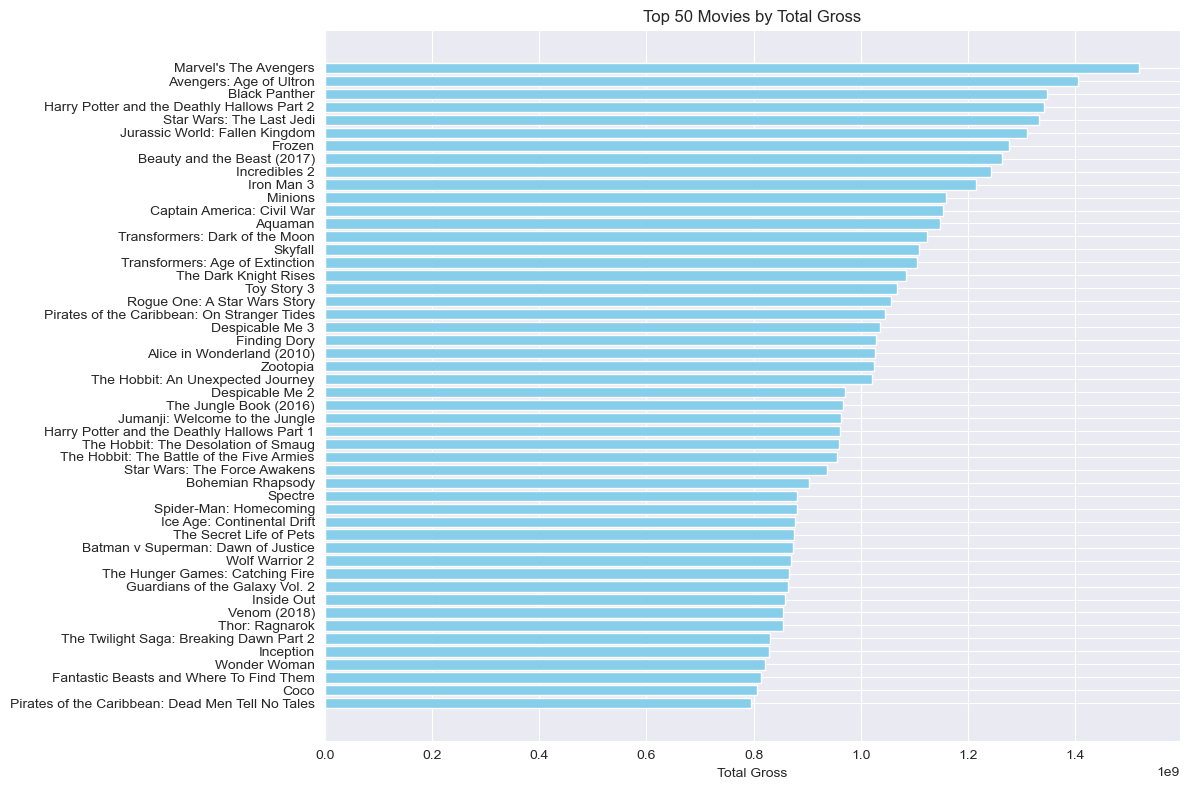

In [92]:
# Horizontal bargraph of  Movies by Total Gross(movie_gross_1)

# Selecting and sorting the top n movies by total gross
top_n = 50
top_movies = movie_gross_1.nlargest(top_n, 'total_gross')

# Plotting the top N movies by total gross
plt.figure(figsize=(12, 8))
plt.barh(top_movies['title'], top_movies['total_gross'], color='skyblue')
plt.xlabel('Total Gross')
plt.title(f'Top {top_n} Movies by Total Gross')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


The bar graph shows us which movies in the data set had the most gross income.




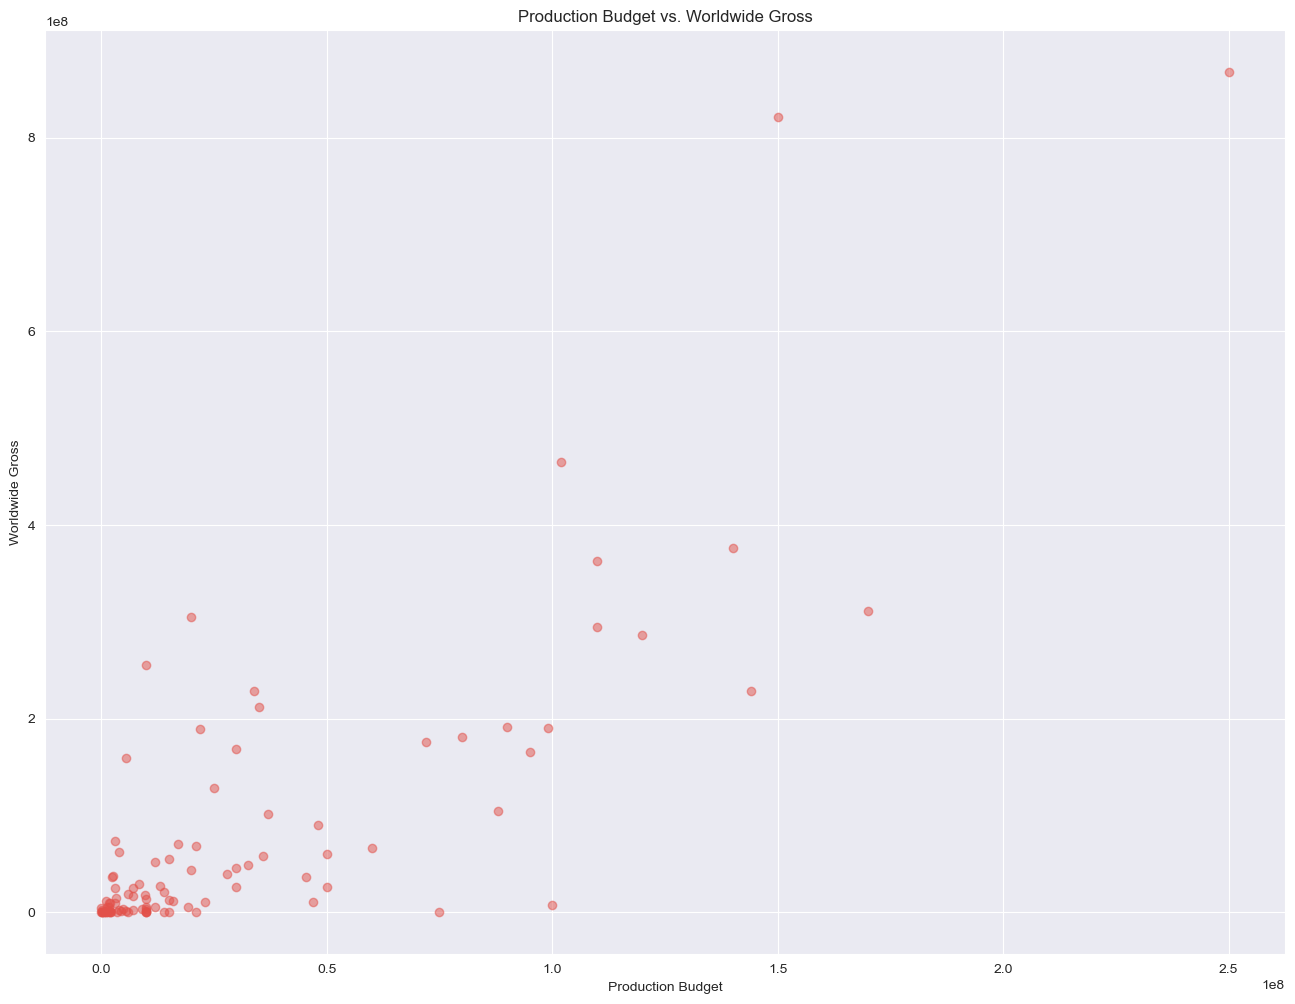

In [191]:
#production budget against world wide gross (movie_budgets_1)

# Sample a subset of 20 rows 
sampled_data = movie_budgets_1.sample(n=100) 

# Plotting 'worldwide_gross' against 'production_budget' for the sampled data
plt.figure(figsize=(16, 12))
plt.scatter(sampled_data['production_budget'], sampled_data['worldwide_gross'], alpha=0.5)
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()


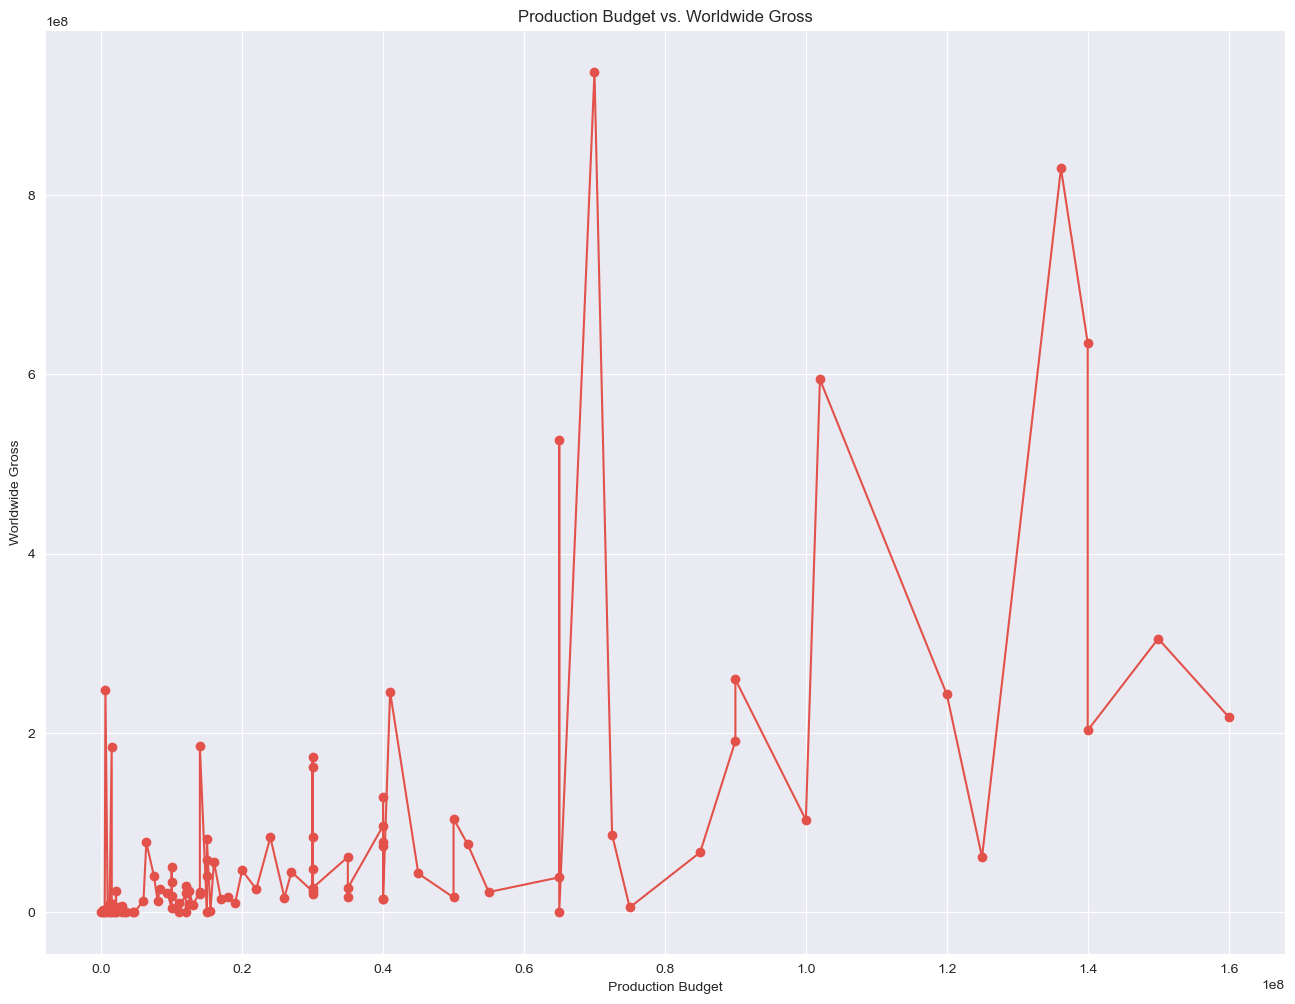

In [190]:
# Sample a subset of 20 rows 
sampled_data = movie_budgets_1.sample(n=100) 

# Sorting sampled data by 'production_budget' for line graph
sampled_data_sorted = sampled_data.sort_values('production_budget')

# Plotting 'worldwide_gross' against 'production_budget' using a line graph
plt.figure(figsize=(16, 12))
plt.plot(sampled_data_sorted['production_budget'], sampled_data_sorted['worldwide_gross'], marker='o', linestyle='-')
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()


From the scatter plot, there is an increase in the worldwide gross income as the production budget increases.
This observed pattern may be due to the numerous benefits brought on by bigger budgets. These benefits can include: hiring of more skilled writers, directors, and actors; better sets and shooting locations and even better equipment. These factors can contribute to the production of movies that attract bigger audiences resulting in more worldwide gross income.




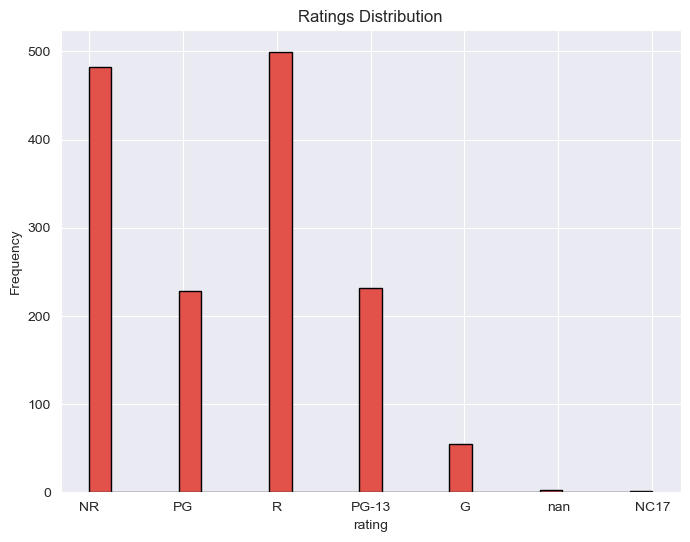

In [185]:
# histogram for ratings (movie_info_1)

# Sample a subset of 1500 rows
sampled_data = movie_info_1.sample(n=1500) 

# Plotting the distribution of 'runtime' for the sampled data using a histogram
plt.figure(figsize=(8, 6))
plt.hist(sampled_data['rating'], bins=25, edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram above shows how many times each rating occurs in a sample of the dataframe.

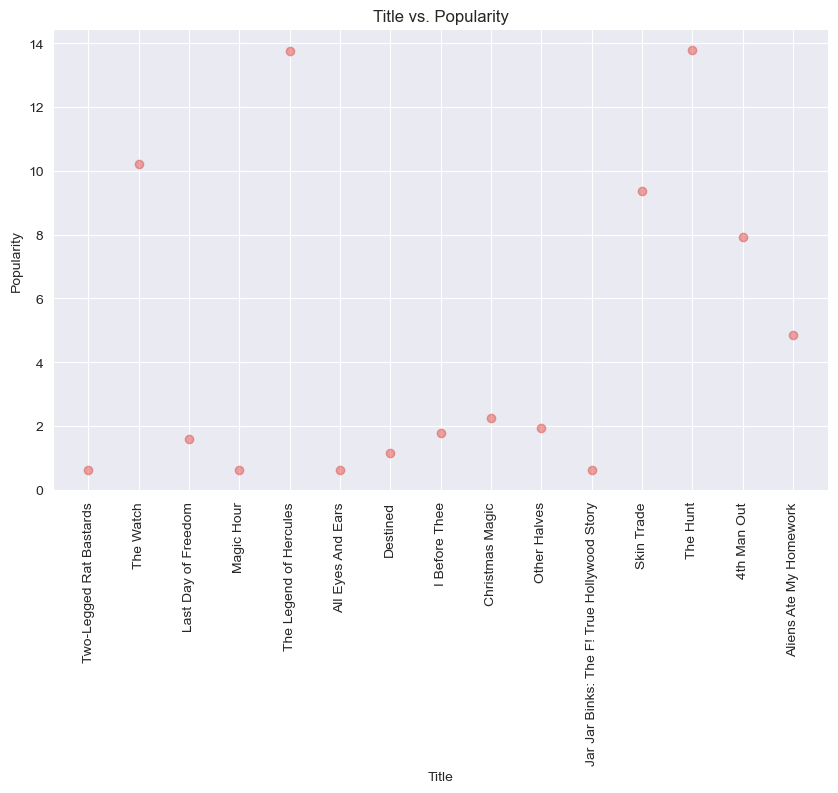

In [186]:
# Sample a subset of 15 values
sampled_data = tmdb_1.sample(n=15)  

# Plotting the sampled data for 'title' against 'popularity'
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['title'], sampled_data['popularity'], alpha=0.5) 
plt.title('Title vs. Popularity')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



The scatter plot above shows movie titles and their popularity.

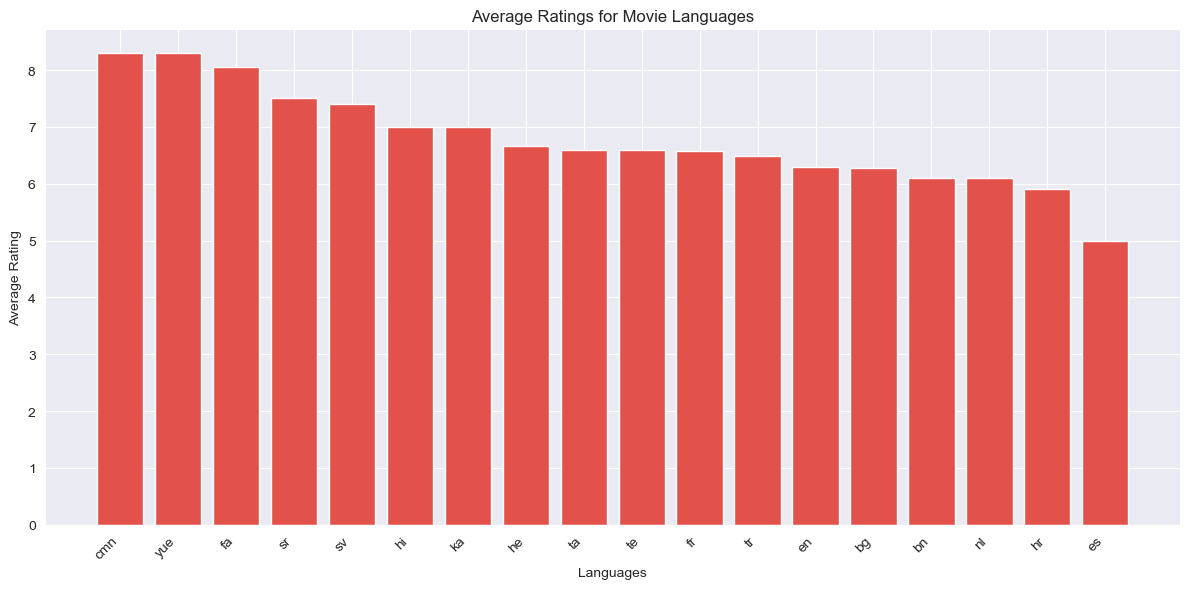

In [188]:


# joining movie_basics, movie_ratings and movie_akas tables to get more info about the database.
query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes,
           a.region, a.language
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id) 
    JOIN movie_akas AS a USING (movie_id) 

    LIMIT 1000;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
import matplotlib.pyplot as plt

# Dictionary to store language-wise ratings and counts
language_ratings = {}
language_counts = {}

for row in results:
    language = row[6]  # Assuming language is at index 6 in the row
    rating = row[3]    # Assuming rating is at index 3 in the row
    
    if language is not None:  # Checking for None values
        if language in language_ratings:
            language_ratings[language] += rating
            language_counts[language] += 1
        else:
            language_ratings[language] = rating
            language_counts[language] = 1

# Calculate average ratings for each language
average_ratings = {lang: language_ratings[lang] / language_counts[lang] for lang in language_ratings}

# Sorting languages by average rating
sorted_languages = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)
languages, ratings = zip(*sorted_languages)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(languages, ratings)
plt.title('Average Ratings for Movie Languages')
plt.xlabel('Languages')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



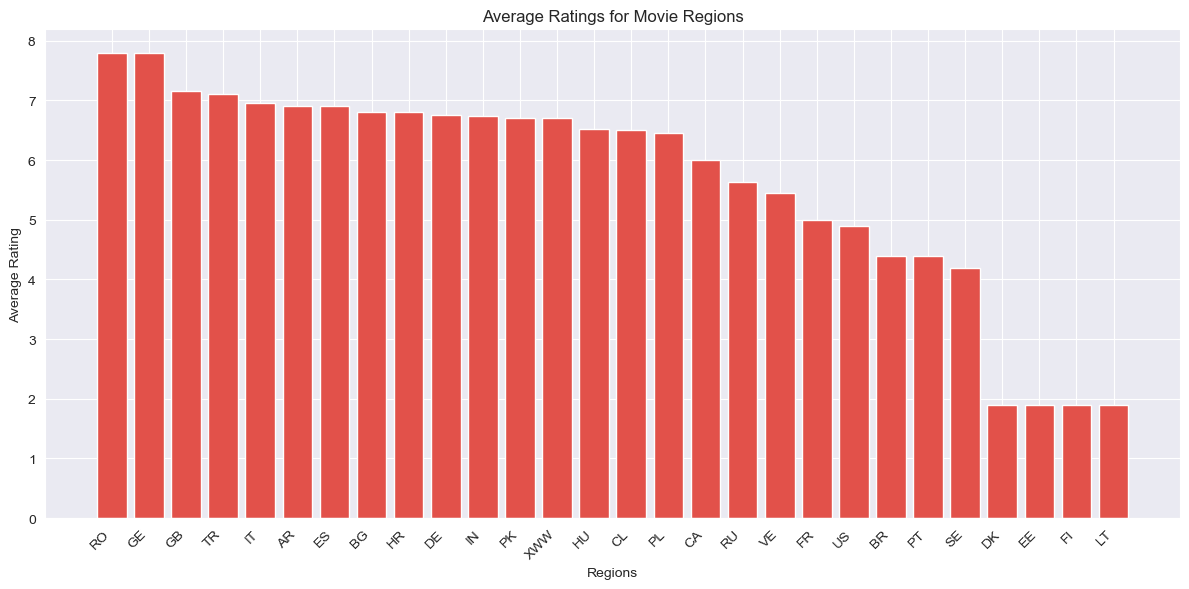

In [167]:
# joining movie_basics, movie_ratings and movie_akas tables to get more info about the database.
query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes,
           a.region, a.language
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id) 
    JOIN movie_akas AS a USING (movie_id) 

    LIMIT 100;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
#import matplotlib.pyplot as plt

# Dictionary to store region-wise ratings and counts
region_ratings = {}
region_counts = {}

for row in results:
    region = row[5]    # Assuming region is at index 5 in the row
    rating = row[3]    # Assuming rating is at index 3 in the row
    
    if region is not None:  # Checking for None values
        if region in region_ratings:
            region_ratings[region] += rating
            region_counts[region] += 1
        else:
            region_ratings[region] = rating
            region_counts[region] = 1

# Calculate average ratings for each region
average_ratings = {reg: region_ratings[reg] / region_counts[reg] for reg in region_ratings}

# Sorting regions by average rating
sorted_regions = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)
regions, ratings = zip(*sorted_regions)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(regions, ratings)
plt.title('Average Ratings for Movie Regions')
plt.xlabel('Regions')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


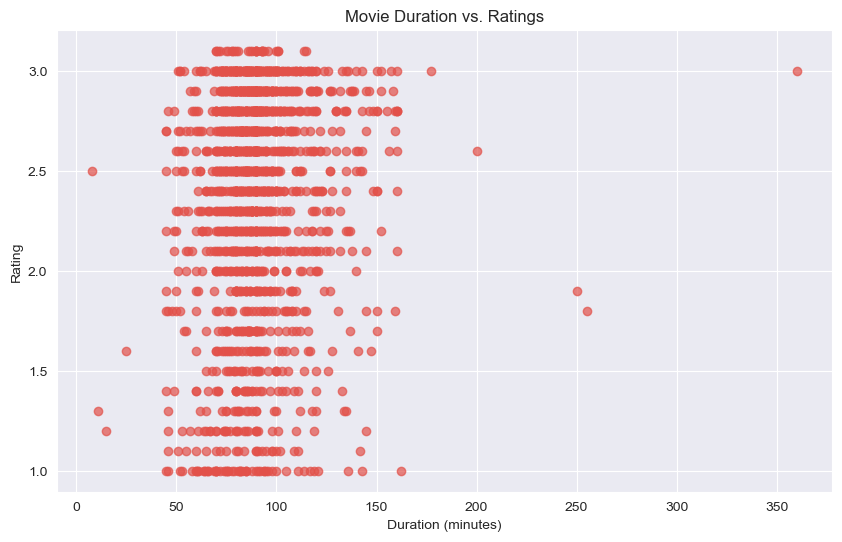

In [168]:
# scatter plot of durations against ratings for the last 2000 movies with the lowest ratings.

# joining movie_basics and movie_ratings tables 
# ordering the results in ascending order based on the average rating and limiting output to 2000.

query = """
    SELECT b.primary_title, b.runtime_minutes, r.averagerating
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating ASC
    LIMIT 2000;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()


# Lists to store durations and ratings
durations = []
ratings = []

for row in results:
    durations.append(row[1])  
    ratings.append(row[2])  

# Plotting the durations against ratings
plt.figure(figsize=(10, 6))
plt.scatter(durations, ratings, alpha=0.7)
plt.title('Movie Duration vs. Ratings')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


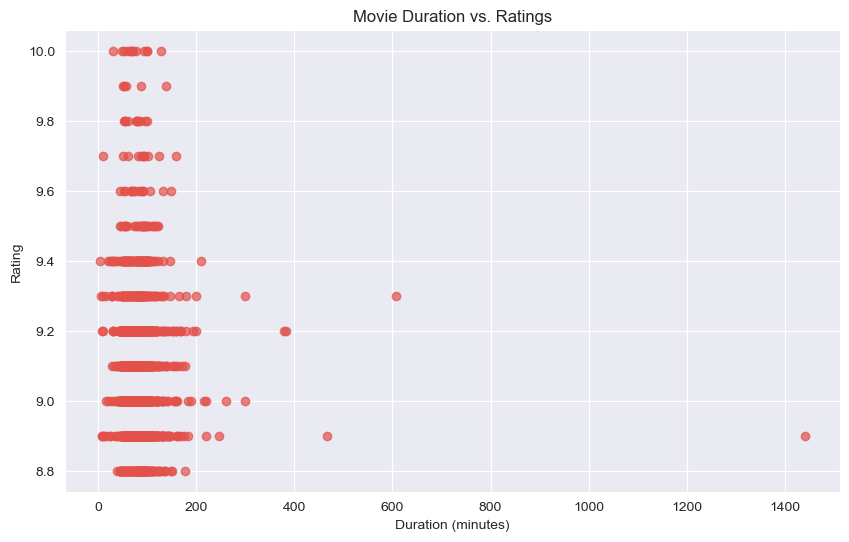

In [169]:
# scatter plot of durations against ratings for the first 2000 movies with the highest ratings.

# joining movie_basics and movie_ratings tables 
# ordering the results in descending order based on the average rating and limiting output to 2000.

query = """
    SELECT b.primary_title, b.runtime_minutes, r.averagerating
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating DESC
    LIMIT 2000;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()


# Lists to store durations and ratings
durations = []
ratings = []

for row in results:
    durations.append(row[1]) 
    ratings.append(row[2])  

# Plotting the durations against ratings
plt.figure(figsize=(10, 6))
plt.scatter(durations, ratings, alpha=0.7)
plt.title('Movie Duration vs. Ratings')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


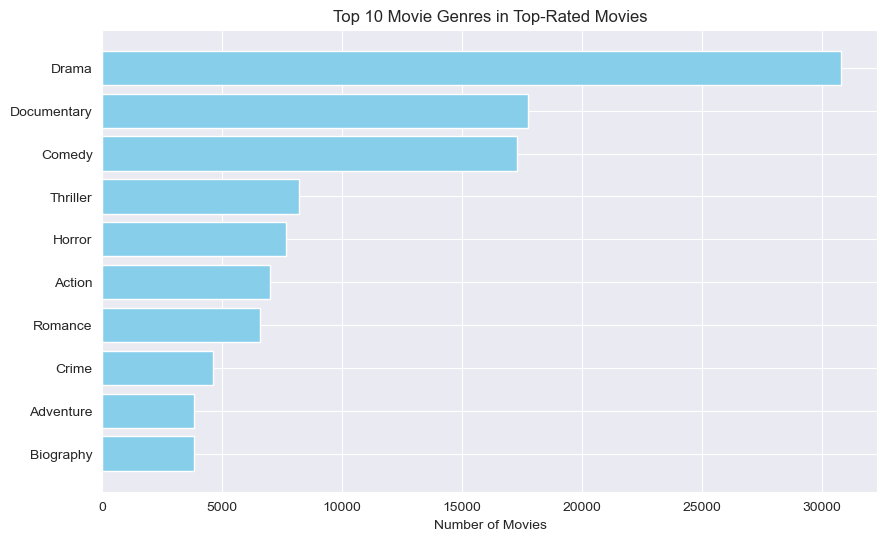

In [170]:
# horizontal bar graph  of Top 10 Movie Genres in Top-Rated Movies.

# joining movie_basics and movie_ratings tables and selecting columns.

query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating ASC;
"""
    
# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Dictionary to store genre counts
genre_counts = {}

for row in results:
    genres = row[2].split(',') if row[2] else []
    for genre in genres:
        genre = genre.strip()  # Removing extra spaces
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Sort genres by count in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Extracting genres and counts for plotting
top_genres = [genre[0] for genre in sorted_genres[:10]]  # Top 10 genres
genre_counts = [genre[1] for genre in sorted_genres[:10]]  # Counts of top 10 genres

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(top_genres, genre_counts, color='skyblue')
plt.xlabel('Number of Movies')
plt.title('Top 10 Movie Genres in Top-Rated Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent genre on top
plt.show()


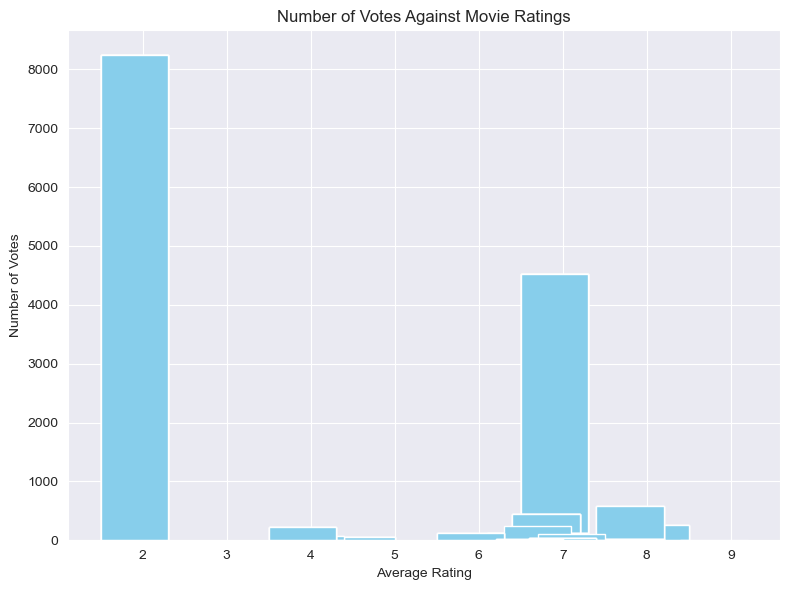

In [189]:
# A Bar Graph sowing the Number of votes against the rating.

# Query to join tables and get more info
query = """
    SELECT r.averagerating, r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id) 
    JOIN movie_akas AS a USING (movie_id) 
    LIMIT 100;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Lists to store data for plotting
ratings = []
num_votes = []

# fetching the data
for row in results:
    ratings.append(row[0])
    num_votes.append(row[1])


# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(ratings, num_votes, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Number of Votes Against Movie Ratings')
plt.tight_layout()
plt.show()
